# Volleyball Statistic Importantance

I've started coaching middle school volleyball. Being the analytically minded individual I am, I looked up the kind of statistics volleyball coaches use to help their teams improve.

## Problem Statement

Of the statistics that can be run using the below information, which ones are actually helpful in determining whether the team will win the match?

## Context

Our team tracks nine pieces of information, three related to each passing, hitting, and serving:

#### Passing

- To target (pass was to the setter: good)
- Off tartet (pass was up and playable: okay)
- Error (point was given to the other team due to player error)

#### Hitting

- Kill (the hit scored a point)
- Hit attempt (the hit was good, but the other team played it)
- Hit error (point was given to the other team due to player error)

#### Serving
- Ace (serve scored a point without being returned)
- Good (serve was in bounds and playable)
- Error (serve was out of bounds or other error giving the point to the other team)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,9)})

def melt_and_swarm(df, col_vars, val_vars):
    data_df = pd.melt(df.reset_index(), id_vars=col_vars,
                  value_vars=val_vars)
    sns.swarmplot(data=data_df,
                x='variable', y='value', hue='set_outcome', s=12)
    plt.show()

### Observation grouping

We track information at the player and set level (at the middle school level, the team that wins the best of three sets wins the game). I grouped this player level data by set because there is a score and outcome at the set level. This allows me to evaluate each metric against the set outcome.

Also, I don't want to make information about individual middle school players publically available.

In [23]:
by_set = pd.read_csv('data/vball_by_set.csv')
by_set.head()

,date,opponent,set,to_target,off_target,pass_error,total_passes,pass_avg,weighted_pass_avg,perfect_pass_avg,...,ace_pct,error_pct,kill,hit_attempt,hit_error,total_hits,kill_pct,kill_efficiency,dig_to_swing,ppass_to_swing
0,8/12/2021,hillsboro,1,34.0,14.0,3.0,51.0,0.941176,1.607843,0.666667,...,0.250000,0.321429,11.0,4.0,2.0,17.0,0.647059,0.529412,0.354167,0.500000
1,8/12/2021,hillsboro,2,40.0,13.0,0.0,53.0,1.000000,1.754717,0.754717,...,0.352941,0.117647,17.0,4.0,4.0,25.0,0.680000,0.520000,0.471698,0.625000
2,8/14/2021,cks,1,15.0,10.0,5.0,30.0,0.833333,1.333333,0.500000,...,0.333333,0.041667,8.0,10.0,4.0,22.0,0.363636,0.181818,0.880000,1.466667
3,8/14/2021,cks,2,20.0,8.0,6.0,34.0,0.823529,1.411765,0.588235,...,0.000000,0.300000,11.0,9.0,8.0,28.0,0.392857,0.107143,1.000000,1.400000
4,8/14/2021,cks,3,20.0,3.0,5.0,28.0,0.821429,1.535714,0.714286,...,0.142857,0.000000,5.0,10.0,4.0,19.0,0.263158,0.052632,0.826087,0.950000


## Methodology

To prevent overlapping datapoints, I used swarm plots. This plot type spreads the points horizontally.

Another option would have been to lower the alpha, making the points semi-transparent. This gives areas of higher density darker, more solid coloring. This option is good for datasets with lots of data points, but the volleyball data points aren't *that* numerous.

To keep the scale of the charts appropriate, I broke each skill into two charts: one for counts and one for ratios.

Counts can't always be grouped together; some categories may have 0 - 10 while another may have 1,000 - 1,000,000. However, the distribution of counts for each volleyball skill are relatively narrow and within the same general range.

## Passing

### Counts

The passing counts chart is pretty straight forward. The more passes we get to the setter, the more likely we win. There is a pretty clear divide around 27 passes to target. All sets where we get at least that many passes to our setter, we win.

The importance of passes that are playable but not to the target and errors isn't as clear.

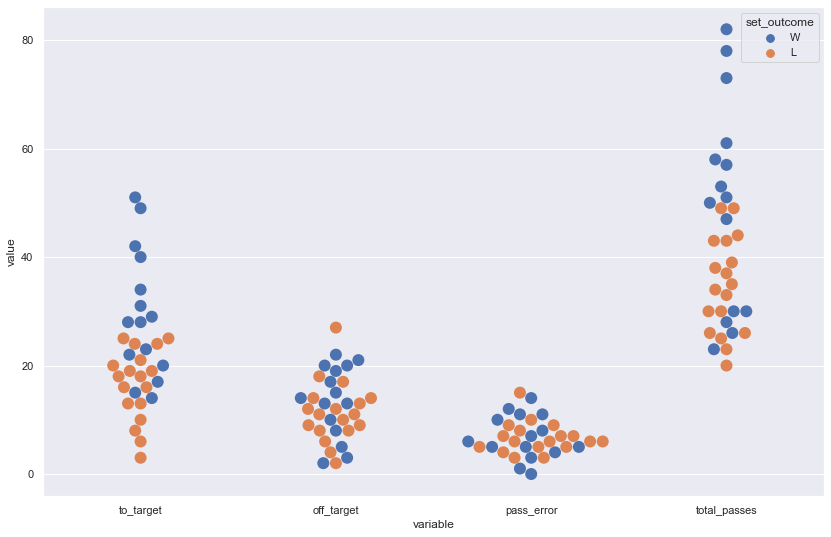

In [24]:
melt_and_swarm(by_set, ['date','opponent', 'set', 'set_outcome'], ['to_target', 'off_target', 'pass_error', 'total_passes'])

### Ratios

#### Methodology

I calculated four ratios from the metrics we track:

- Pass average
  - $\text{pass_avg} = \frac{\text{to_target } + \text{ off_target}}{\text{total_passes}}$
- Weighted pass average
  - $\text{weighted_pass_avg} = \frac{\text{2(to_target) } + \text{ off_target}}{\text{total_passes}}$
- Perfect pass average
  - $\text{perfect_pass_avg} = \frac{\text{to_target }}{\text{total_passes}}$
- Pass efficiency
  - $\text{pass_efficiency} = \frac{\text{to_target } + \text{ off_target } - \text{ pass_error}}{\text{total_passes}}$

Where:

- total_passes = to_target + off_target + pass_error

#### Findings

All four ratios clearly show that lower values equate to losses. To have a chance at winning, we obviously have to get our passes up.

The higher side is less clear. The metric that is most clear is the weighted pass average. This is the same as the passing average, but gives double credit for passes that are to the setter. When looking at the top five games, we can see a clear advantage for good passes vs passes that are just playable.

C:\Users\jfish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


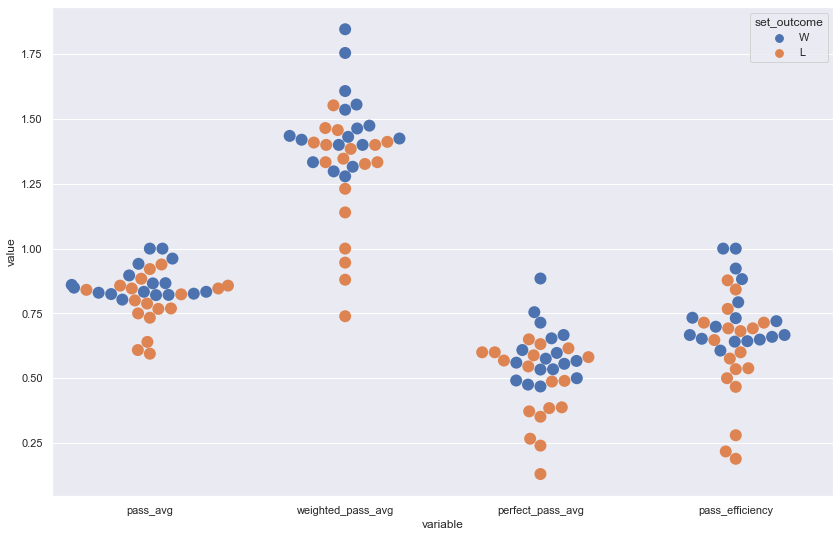

In [16]:
melt_and_swarm(by_set, ['date','opponent', 'set', 'set_outcome'],  ['pass_avg', 'weighted_pass_avg',
       'perfect_pass_avg', 'pass_efficiency'])

## Serves

### Counts

When examing the straight counts, there is an obvious advantage to having more aces, good serves, and total count of serves. This can be misleading as volleyball games generally have no more than 50 serves and no less than 25.

In volleyball the scoring system is such that every play results in a point, called rally scoring. Sets are played to 25 points, with a requirement to win by 2.

This means that if one team scores all the points, they'll serve 25 times in a row. If the teams trade points back and forth, each team could serve $\frac{25}{2}$ times (winning on the other team's serve still gives the non-serving team a point) + 2 to win => 27 serves.

This information does cast some doubt on the validity of the data. Pulling up the underlying observations helps determine just how strong the doubt is: see below the chart for details.

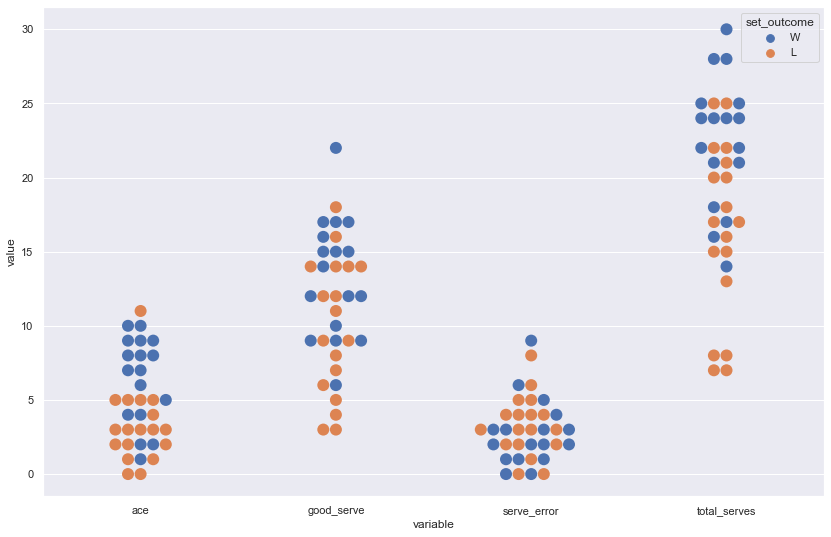

In [10]:
melt_and_swarm(by_set, ['date','opponent', 'set', 'set_outcome'], ['ace', 'good_serve', 'serve_error', 'total_serves'])

#### Deep Dive

I added a couple of columns to help determine the extent of how messy/noisy the data is:

- The total number of errors. These are items that result in the other team getting a point
  - $\text{total_errors} = \text{serve_error } + \text{ pass_error } + \text{ hit_error}$
  - The count of errors should be around the same value as the other team's score
- The total number of scoring actions. These are items that result in a point for our team.
  - $\text{point_scorers} = \text{ace } + \text{ kill}$
  - The number of point scorers is expected to be below our score, as opponent errors also contribute to our points
  
A best guess for the discrepancy is that some of our stat keepers (middle school students from sister teams in other age groups) count an ace as both a good serve and an ace.

In [29]:
data_check = by_set[['date','opponent', 'set', 'our_score', 'opponent_score', 'ace', 'good_serve', 'serve_error', 'total_serves', 'pass_error', 'hit_error', 'kill']].sort_values('total_serves', ascending=False).head(10)
data_check['total_errors'] = data_check['serve_error'] + data_check['pass_error'] + data_check['hit_error']
data_check['point_scorers'] = data_check['ace'] + data_check['kill']
data_check[['date','opponent', 'set', 'our_score', 'point_scorers', 'total_serves', 'opponent_score', 'total_errors', 'ace', 'kill', 'good_serve', 'serve_error', 'pass_error', 'hit_error']]

,date,opponent,set,our_score,point_scorers,total_serves,opponent_score,total_errors,ace,kill,good_serve,serve_error,pass_error,hit_error
23,8/9/2021,sunset,1,25,15.0,30.0,22.0,21.0,9.0,6.0,17.0,4.0,14.0,3.0
0,8/12/2021,hillsboro,1,25,18.0,28.0,28.0,14.0,7.0,11.0,12.0,9.0,3.0,2.0
24,8/9/2021,sunset,2,25,15.0,28.0,19.0,19.0,8.0,7.0,15.0,5.0,11.0,3.0
6,8/14/2021,heritage,2,23,14.0,25.0,25.0,17.0,5.0,9.0,18.0,2.0,7.0,8.0
25,9/13/2021,heritage,1,25,11.0,25.0,12.0,8.0,8.0,3.0,17.0,0.0,8.0,0.0
10,8/14/2021,page,1,24,6.0,25.0,26.0,14.0,3.0,3.0,14.0,8.0,5.0,1.0
32,9/8/2021,grassland,2,25,5.0,25.0,13.0,13.0,2.0,3.0,22.0,1.0,10.0,2.0
5,8/14/2021,heritage,1,25,10.0,24.0,21.0,13.0,5.0,5.0,17.0,2.0,1.0,10.0
30,9/2/2021,woodland,2,25,14.0,24.0,23.0,16.0,9.0,5.0,12.0,3.0,11.0,2.0
14,8/18/2021,spring station,1,25,8.0,24.0,15.0,11.0,7.0,1.0,14.0,3.0,5.0,3.0


### Ratios

#### Methodology

I calculated four ratios from the metrics we track:

- Serve average
  - $\text{serve_avg} = \frac{\text{ace } + \text{ good_serve}}{\text{total_serves}}$
- Ace ratio
  - $\text{ace_pct} = \frac{\text{ace}}{\text{total_serves}}$
- Error ratio
  - $\text{error_pct} = \frac{\text{serve_error}}{\text{total_serves}}$

Where:

- total_serves = ace + good_serve + serve_error

#### Findings

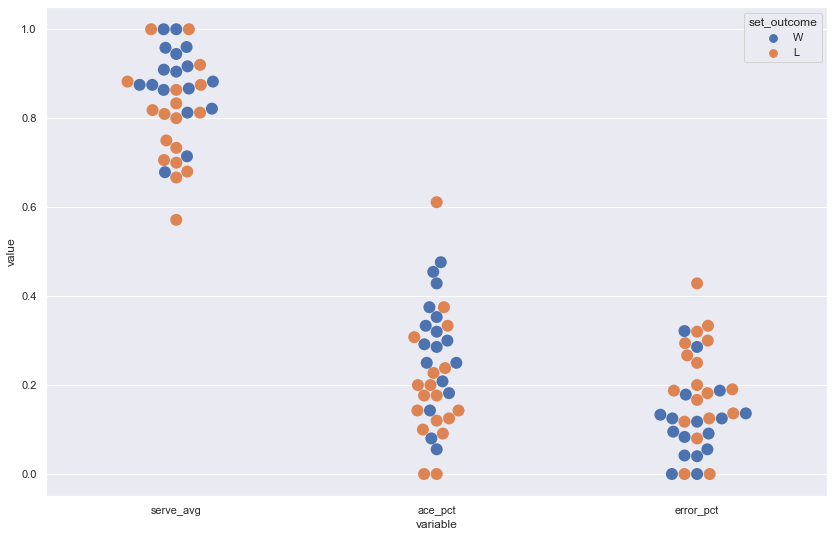

In [11]:
melt_and_swarm(by_set, ['date','opponent', 'set', 'set_outcome'], ['serve_avg', 'ace_pct', 'error_pct'])

## Hits

### Counts


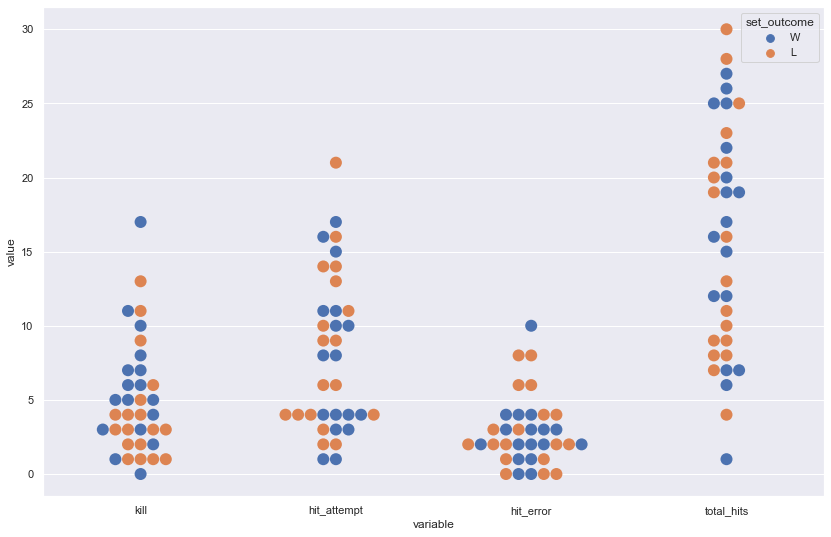

In [12]:
melt_and_swarm(by_set, ['date','opponent', 'set', 'set_outcome'], ['kill', 'hit_attempt', 'hit_error',
       'total_hits'])

### Ratios

#### Methodology

I calculated four ratios from the metrics we track:

- Kill ratio
  - $\text{kill_pct} = \frac{\text{kill}}{\text{total_hits}}$
- Kill efficiency
  - $\text{kill_efficiency} = \frac{\text{kill } - \text{ hit_error}}{\text{total_hits}}$
- Swing to dig ratio
  - $\text{dig_to_swing} = \frac{\text{total_hits}}{\text{to_target } + \text{ off_target}}$
- Swing to perfect pass ratio
  - $\text{ppass_to_swing} = \frac{\text{total_hits}}{\text{to_target }}$

Where:

- total_hits = kill + hit_attempt + hit_error

#### Findings

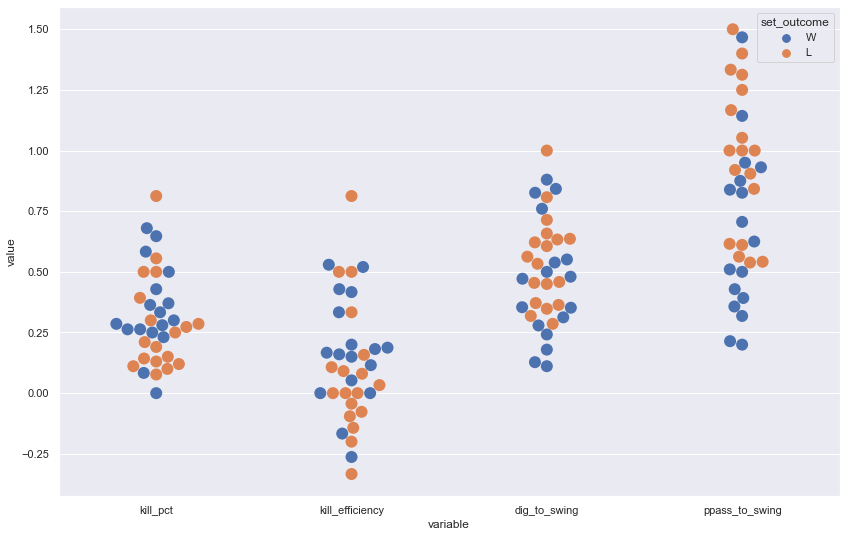

In [13]:
melt_and_swarm(by_set, ['date','opponent', 'set', 'set_outcome'], ['kill_pct', 'kill_efficiency', 'dig_to_swing', 'ppass_to_swing'])